In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [9]:
# Data collection processing
gold_data = pd.read_csv('gold_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
Date       2290 non-null object
SPX        2290 non-null float64
GLD        2290 non-null float64
USO        2290 non-null float64
SLV        2290 non-null float64
EUR/USD    2290 non-null float64
dtypes: float64(5), object(1)
memory usage: 107.4+ KB


In [8]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting the statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
# correlation
# postive correlation
# negative correlation
correlation = gold_data.corr()

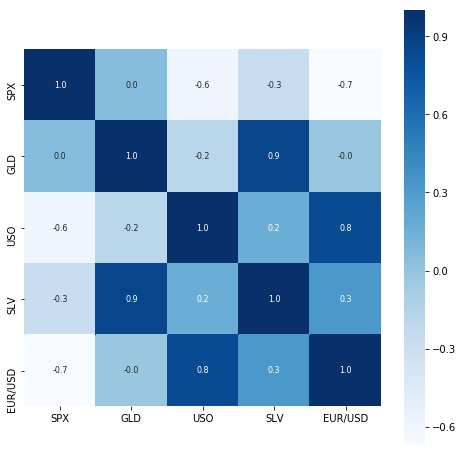

In [13]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [14]:
# correlation value of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


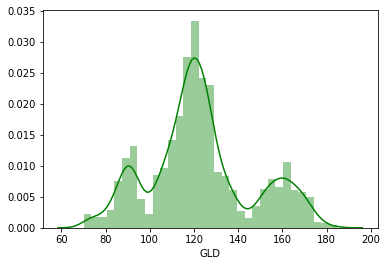

In [15]:
# checking the distribution of GLD price
sns.distplot(gold_data['GLD'],color='green')

In [15]:
#Splitting the features and traget
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']


In [16]:
print(X)

              SPX        USO        SLV   EUR/USD
0     1447.160034  78.470001  15.180000  1.471692
1     1447.160034  78.370003  15.285000  1.474491
2     1411.630005  77.309998  15.167000  1.475492
3     1416.180054  75.500000  15.053000  1.468299
4     1390.189941  76.059998  15.590000  1.557099
5     1409.130005  75.250000  15.520000  1.466405
6     1420.329956  74.019997  16.061001  1.480100
7     1401.020020  73.089996  16.077000  1.479006
8     1416.250000  74.250000  16.280001  1.486900
9     1380.949951  72.779999  15.834000  1.480210
10    1373.199951  71.849998  15.654000  1.466405
11    1333.250000  71.029999  15.717000  1.464000
12    1325.189941  71.540001  16.030001  1.461796
13    1310.500000  70.550003  15.902000  1.464794
14    1338.599976  69.500000  15.900000  1.463208
15    1352.069946  70.930000  16.299999  1.477410
16    1330.609985  71.910004  16.298000  1.467502
17    1353.959961  72.349998  16.549999  1.478809
18    1362.300049  72.980003  16.534000  1.477192


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
5        86.550003
6        88.250000
7        88.580002
8        89.540001
9        87.989998
10       86.699997
11       86.500000
12       87.419998
13       88.169998
14       87.889999
15       90.080002
16       90.300003
17       91.750000
18       91.150002
19       92.059998
20       91.400002
21       89.349998
22       89.099998
23       87.680000
24       88.949997
25       89.849998
26       91.000000
27       91.330002
28       89.330002
29       89.440002
           ...    
2260    128.279999
2261    127.489998
2262    125.730003
2263    125.790001
2264    127.260002
2265    126.300003
2266    126.449997
2267    125.800003
2268    126.820000
2269    127.120003
2270    128.110001
2271    126.620003
2272    127.629997
2273    127.750000
2274    127.849998
2275    127.599998
2276    125.620003
2277    126.230003
2278    125.410004
2279    124.970001
2280    124.589996
2281    123.

In [18]:
# Splitting into Training Data and Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


In [19]:
X_train.head()

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998


In [20]:
# Model Training Random Forest Regression
regressor = RandomForestRegressor(n_estimators=100)

In [22]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)


In [24]:
print(test_data_prediction)

[168.5692991   82.1945997  116.0238006  127.64930059 120.85520117
 154.65709729 150.37359932 126.15380022 117.55679861 125.92790091
 116.63900108 171.37150035 141.41169896 167.96399897 115.03160016
 117.59970071 138.95350266 170.43990121 159.51360255 161.16329873
 155.22790078 125.56490041 175.03259972 157.207204   125.18230036
  93.99850016  76.89190048 120.45170027 119.12299934 167.4622
  88.3144004  125.16439978  91.30760076 117.75720021 120.99339966
 136.73620079 115.79630107 115.1806007  145.19859926 107.14680064
 104.54790248  87.12249784 126.55870032 117.95139989 154.3474991
 119.80789987 108.45489937 108.16779793  93.23590028 127.06539795
  75.22900029 113.67129937 121.25239994 111.44149937 118.94839891
 120.87209917 160.12439919 169.65590107 146.66139642  85.78389856
  94.57880027  86.84079898  90.78070017 118.93900089 126.4169006
 127.53380018 169.41370003 122.16459955 117.47909885  98.50130048
 168.35220159 142.90169852 131.93120254 121.14140211 121.16809939
 119.77180034 11

In [25]:
# R square error
error_score =metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9894247428649651


In [26]:
Y_test = list(Y_test)

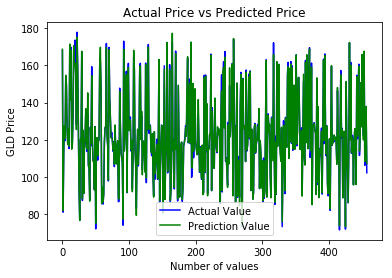

In [27]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Prediction Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [29]:
input_data = (1447.160034,78.470001,151800,1.471692)

# changing the input data to a numpy array
input_data_as_numpy_array =np.asarray(input_data)

# reshape the data as we are predicting the labelfor only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction =regressor.predict(input_data_reshaped)[0]

In [30]:
prediction

150.83440078999988